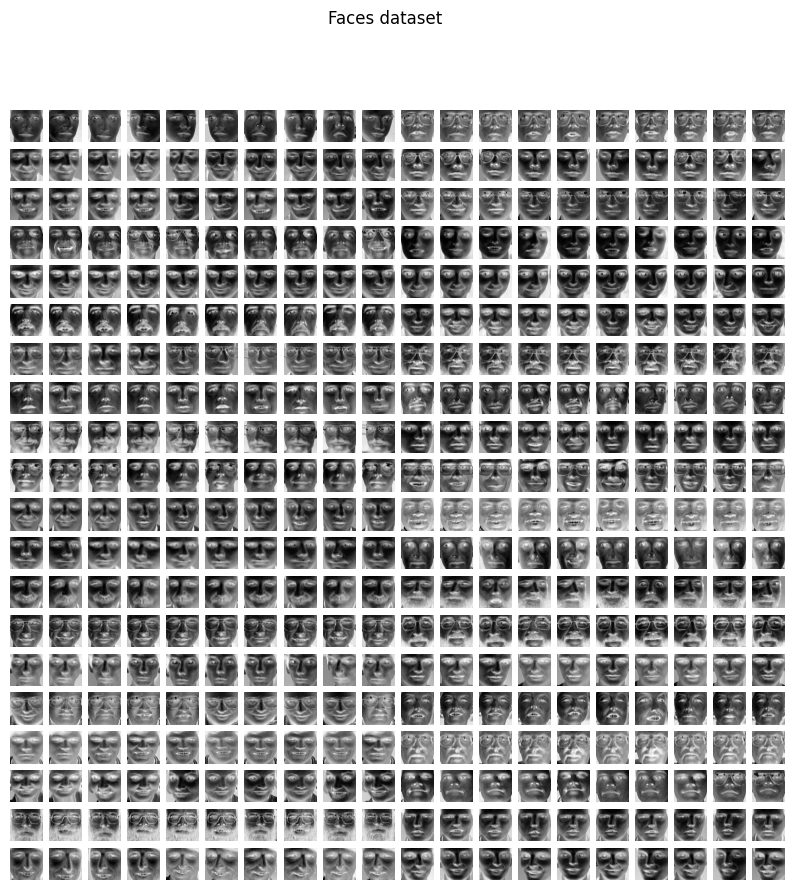

In [2]:
from sklearn import datasets, mixture
import matplotlib.pyplot as plt

faces = datasets.fetch_olivetti_faces()
X = faces.data

fig, axs = plt.subplots(nrows=20, ncols=20, figsize=(10,10))

for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((64,64)), cmap=plt.cm.binary)
    ax.axis('off')
_ = fig.suptitle('Faces dataset', fontsize=12)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(0.99, whiten=True)
X = pca.fit_transform(X)
X.shape

(400, 260)

Curva AIC n $\in$ {1,50} en intervalos de 1

In [5]:
import numpy as np

In [7]:
np.arange(1,6)

array([1, 2, 3, 4, 5])

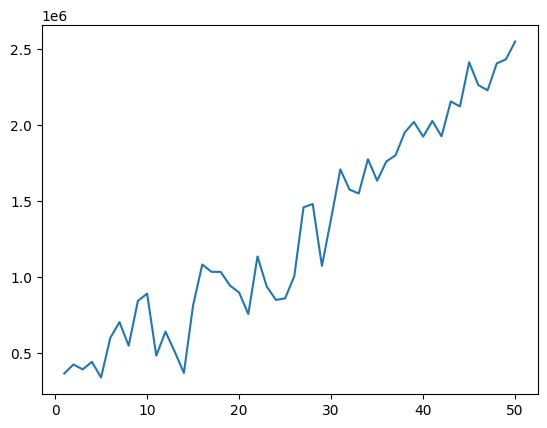

In [8]:
n_components = np.arange(1, 51)
models = [mixture.GaussianMixture(n, covariance_type='full') for n in n_components]
aics = [model.fit(X).aic(X) for model in models]
plt.plot(n_components, aics);

Se busca el minimo:

In [12]:
aics = np.asarray([m.aic(X) for m in models])
kmin = np.where(aics == np.amin(aics))[0][0]
#kmin = kmin*5 + 50
print(kmin)

4


GMM para el numero de componentes

In [13]:
gmm = mixture.GaussianMixture(kmin, covariance_type='full')
gmm.fit(X)
print(gmm.converged_)

True


In [14]:
data_new = gmm.sample(100)
data_new[0].shape

(100, 260)

In [16]:
synthetic_data = pca.inverse_transform(data_new[0])

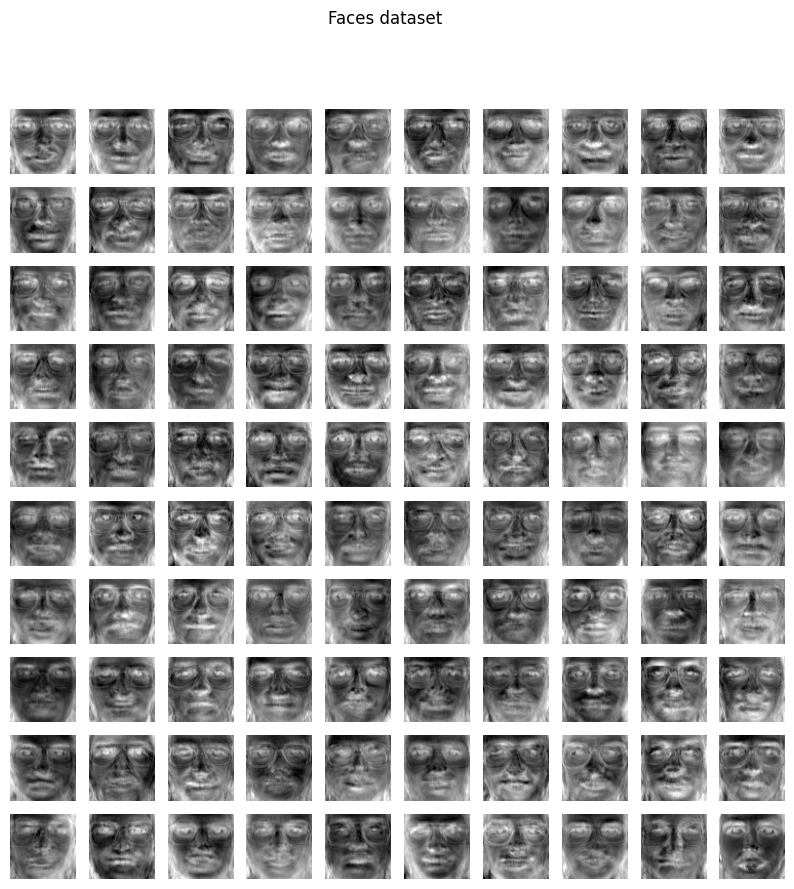

In [18]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(10,10))

for idx, ax in enumerate(axs.ravel()):
    ax.imshow(synthetic_data[idx].reshape((64,64)), cmap=plt.cm.binary)
    ax.axis('off')
_ = fig.suptitle('Faces dataset', fontsize=12)